<img src="https://github.com/gantian127/nwm/blob/master/docs/source/_static/nwm_logo.png?raw=true" width='320' align='right'></a> <img src="https://github.com/rapid-research/rapid-nationalwatermodel/blob/master/notebooks/RAPID-logo.JPG?raw=true" align='left'></a>

## Background
nwm package provides a set of functions that allows downloading of the National Water Model ([NWM](https://water.noaa.gov/about/nwm)) datasets for data analysis and visualization. These functions were implemented using the API of the HydroShare National Water Model Web App. A HydroShare [account](https://www.hydroshare.org/sign-up/) is required to access [the National Water Model forecast viewer](https://hs-apps.hydroshare.org/apps/nwm-forecasts/).

nwm package also includes a Basic Model Interface ([BMI](https://bmi.readthedocs.io/en/latest/)), which converts the NWM dataset into a reusable, plug-and-play data component for [PyMT](https://pymt.readthedocs.io/en/latest/?badge=latest) modeling framework developed by Community Surface Dynamics Modeling System ([CSDMS](https://csdms.colorado.edu/wiki/Main_Page)) 

This Jupyter Notebook was modified by Christina Bandaragoda and originally created by Tian Gan. You can test the original Harvey Jupyter Notebook through [Binder](https://mybinder.org/v2/gh/gantian127/nwm/master?filepath=notebooks%2Fnwm.ipynb) or [HydroShare](http://www.hydroshare.org/resource/87fa0749a0b944228e3c613dc7d8899b). If you have any suggestion to improve the current functions of the nwm package, please create a github issue [here](https://github.com/gantian127/nwm/issues). 

Suggested citation: Gan, T. (2020). Jupyter Notebook for the nwm Python package, HydroShare, http://www.hydroshare.org/resource/87fa0749a0b944228e3c613dc7d8899b

## Quick Start Tutorial 

This notebook will help you get started using the nwm package to download the National Water Model (NWM) datasets. 

This tutorial includes the following sections:

1. [Introduction to Interactive Map resources](#section1)

   This section provides basic information about where to find National Water Model data. 
   <br>
   
2. [Download and Visualize National Water Model data](#section2)
   
   This section provides two examples to demonstrate how to use nwm to download datasets for visualization.
   <br>
   
3. [Write Your Own Code to access and analyze data](#section3)

   This section provides guide to write your own code and explore the NWM datasets for hurricane events. 
   <br>
   

<a id='section1'></a>
## 1. Introduction

**Interactive Map Resource 1:** [National Water Model interactive Map](https://water.noaa.gov/map) is provided by the Office of Water Prediction (OWP) National Water Center provides water information products from version 2.0 of the National Water Model (NWM). Information about NWM products available through the OWP website can be found in this [Product Description Document](https://water.noaa.gov/documents/OWP-interface-PDD.pdf). Advisory: NWM products do not yet incorporate anthropogenic influence and should be used with some caution. The NWM is currently undergoing extensive validation and verification to identify where scientific updates to the model can make the most improvement. The next version of the NWM will be released in the late spring 2020 time frame. [Click here for more information about the NWM.](https://water.noaa.gov/about/nwm)\
**Usefulness:** beautiful viewer with easy to use interface for viewing streamflow forecast\
**Limitations:** no data download, no easy access to other variables

**Interactive Map Resource 2:** On HydroShare there is a tool to download subset maps and time series using the [National Water Model Data Viewer on HydroShare App](https://hs-apps.hydroshare.org/apps/nwm-forecasts/).  This is what we recommend for advance research users. \
**Usefulness:** download data subsets and individual time series, with user knowledge, it eventually can be easy access to other variables and hurricane archives.\
**Limitations:** training and support may be required to navigate the research software in development

<a id='section2'></a>
## 2. Start with Examples

In nwm package, NwmHs class is designed for users to download datasets. BmiNwmHs class is designed to convert NWM dataset as a data component for the [PyMT](https://pymt.readthedocs.io/en/latest/?badge=latest) modeling framework. The following examples demonstrate how to download the same dataset using NwmHs and BmiNwmHs for data visualization. 

### Example 1: use NwmHs class to download data (Recommended method)

Import NwmHs class and download data with **get_data( )** method. This example downloads short range (18 hours) forecast  of streamflow at a river channel during a hurricane event. You can check the details of the [parameter settings](https://nwm.readthedocs.io/en/latest/#parameter-settings) for get_data( ) method to better understand the parameter values used in the example.

In [1]:
!pip install nwm

  Using cached nwm-0.1.2-py3-none-any.whl (12 kB)


In [2]:
import matplotlib.pyplot as plt
from nwm import NwmHs

# download streamflow data
nwm_data = NwmHs()
dataset = nwm_data.get_data(archive='harvey', config='short_range', geom='channel_rt',
                            variable='streamflow', comid=[5781915], init_time=0, 
                            start_date='2017-08-23')

The downloaded NWM dataset is stored as a self-described xarray object. With this data object, you can check the metadata and make time series plot.

In [3]:
# show metadata
dataset.attrs

{'site_name': 'COMID: 5781915; Short Range, Channel (streamflow).',
 'variable_name': 'Flow Forecast',
 'variable_unit_name': 'Flow',
 'variable_unit': 'cfs',
 'value_type': 'Derived Value',
 'no_data_value': '-9999',
 'archive': 'harvey'}

Text(0.5, 1.0, 'Short range streamflow forecast for Channel 5781915 during Harvey Hurricane Event')

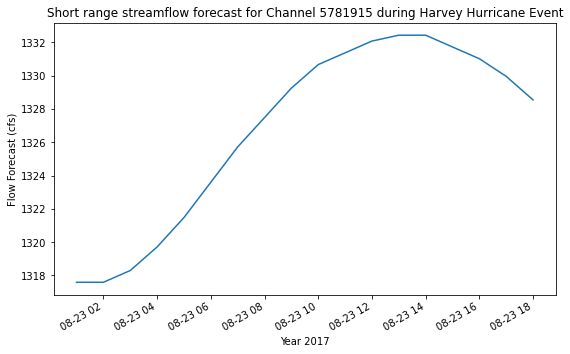

In [4]:
# plot data
plt.figure(figsize=(9,5))
dataset.plot()
plt.xlabel('Year 2017')
plt.ylabel('{} ({})'.format(dataset.variable_name,dataset.variable_unit))
plt.title('Short range streamflow forecast for Channel 5781915 during Harvey Hurricane Event')

### Example 2: use BmiNwmHs class to download data (Demonstration of how to use BMI)

Import BmiNwmHs class and instantiate it. A configuration file (yaml file) is required to provide the parameter settings for data download. An example configure_file.yaml file is provided in the same folder with this Jupyter Notebook file. You can also skip this example and try section 3 to use NwmHs class for data download.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cftime

from nwm import BmiNwmHs

# initiate a data component
data_comp = BmiNwmHs()
data_comp.initialize('config_file.yaml')

Use variable related methods from BmiNwmHs class to check the variable information of the NWM dataset. This data component stores a flow forecast variable. 

In [7]:
# get variable info
var_name = data_comp.get_output_var_names()[0]
var_unit = data_comp.get_var_units(var_name)
print(' variable_name: {}\n var_unit: {}\n'.format(var_name, var_unit))

 variable_name: Flow Forecast
 var_unit: cfs



Use time related methods of BmiNwmHs class to check the time information of the NWM dataset. The time values are stored in a format which follows [CF convention](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.8/cf-conventions.pdf). 

In [8]:
# get time info
start_time = data_comp.get_start_time()
end_time = data_comp.get_end_time()
time_step = data_comp.get_time_step()
time_unit = data_comp.get_time_units()
time_steps = int((end_time - start_time)/time_step) + 1
print(' start_time:{}\n end_time:{}\n time_step:{}\n time_unit:{}\n time_steps:{}\n'.format(start_time, end_time, time_step, time_unit, time_steps))

 start_time:1503450000.0
 end_time:1503511200.0
 time_step:3600.0
 time_unit:seconds since 1970-01-01 00:00:00 UTC
 time_steps:18



Loop through each time step to get the flow and time values. stream_array stores flow forecast values. cftime_array stores the numerical time values. time_array stores the corresponding  Python datetime objects. get_value( ) method returns the flow forecast value at each time step. update( ) method updates the current time step of the data component.

In [9]:
# initiate numpy arrays to store data
stream_value = np.empty(1)
stream_array = np.empty(time_steps)
cftime_array = np.empty(time_steps)

for i in range(0, time_steps):
    data_comp.get_value(var_name, stream_value)
    stream_array[i] = stream_value
    cftime_array[i] = data_comp.get_current_time()
    data_comp.update()
    
time_array = cftime.num2date(cftime_array, time_unit, only_use_cftime_datetimes=False, only_use_python_datetimes=True)

Text(0.5, 1.0, 'Short range streamflow forecast for Channel 5781915 during Harvey Hurricane Event')

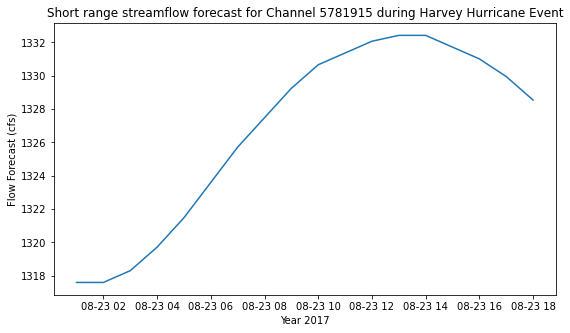

In [11]:
# plot data
plt.figure(figsize=(9,5))
plt.plot(time_array, stream_array)
plt.xlabel('Year 2017')
plt.ylabel('{} ({})'.format(var_name, var_unit))
plt.title('Short range streamflow forecast for Channel 5781915 during Harvey Hurricane Event')

<a id='section3'></a>
## 3. Write Your Own Code 

NwmHs class can be used to download datasets for several hurricane events, including [Harvey (2017)](https://en.wikipedia.org/wiki/Hurricane_Harvey), [Irma (2017)](https://en.wikipedia.org/wiki/Hurricane_Irma), and [Florence (2018)](https://en.wikipedia.org/wiki/Hurricane_Florence). Try with the following instructions and write your own code to explore the data for Hurricane Harvey. You can check the [parameter settings](https://nwm.readthedocs.io/en/latest/#parameter-settings) for get_data( ) method to download various climate forcing and forecast datasets.

### Hurricane Harvey 

Hurricane Harvey made landfall on Texas and Louisiana in August 2017. It caused catastrophic flooding and many deaths. In this use case, we will explore the datasets for Nederland, Texas, an area impacted by flooding during the hurricane event.

In [12]:
import matplotlib.pyplot as plt
from nwm import NwmHs

nwm_data = NwmHs()

**Step1: Explore climate forcing data**

Download the rain rate data of a grid cell (comid=[833, 2596]) which locates in the Nederland area. The data is **short range** forecast for 2017-08-28 with model initiation time as 00:00.

In [13]:
# download rain rate data
rain_rate = nwm_data.get_data(archive='harvey', config='short_range', geom='forcing',
                              variable='RAINRATE', comid=[833, 2596], init_time=0, 
                              start_date='2017-08-28')

*Double-click __here__ for the solution.*

<!-- Your answer is below:

rain_rate = nwm_data.get_data(archive='harvey', config='short_range', geom='forcing',
                              variable='RAINRATE', comid=[833, 2596], init_time=0, 
                              start_date='2017-08-28')

-->

Plot the rain rate data. Heavy rainfall is usually more than 0.30 in/hr. What is the max rain rate for the grid area on that day?

Text(0.5, 1.0, 'Rain rate for grid cell [833, 2596]')

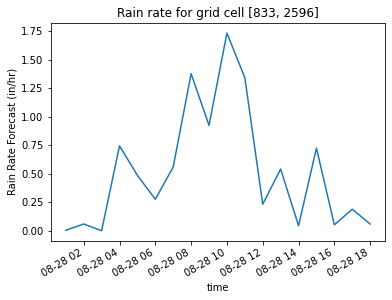

In [14]:
# plot rain rate data
rain_rate.plot()
plt.ylabel('{} ({})'.format(rain_rate.variable_name,rain_rate.variable_unit))
plt.title('Rain rate for grid cell [833, 2596]')

Download the air temperature data for the same grid cell (comid=[833, 2596]). Let's get this climate forcing data for **medium range** forecast starting from 2017-08-28 with model initiation time as 00:00.

In [15]:
# download air temperature data
air_temp = air_temp = nwm_data.get_data(archive='harvey', config='medium_range', geom='forcing',
                             variable='T2D', comid=[833, 2596], init_time=0, 
                             start_date='2017-08-28')

*Double-click __here__ for the solution.*

<!-- Your answer is below:

air_temp = nwm_data.get_data(archive='harvey', config='medium_range', geom='forcing',
                             variable='T2D', comid=[833, 2596], init_time=0, 
                             start_date='2017-08-28')
-->

Plot the air temperature data. What is the max and min air temperature for the grid area during 2017-08-28 to 2017-09-27?

Text(0.5, 1.0, 'Air temperature for grid cell [833, 2596]')

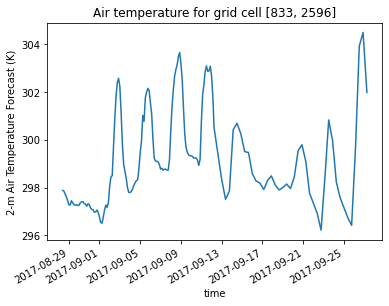

In [16]:
# plot air temperature data
air_temp.plot()
plt.ylabel('{} ({})'.format(air_temp.variable_name,air_temp.variable_unit))
plt.title('Air temperature for grid cell [833, 2596]')

**Step2: Explore streamflow forecast results**

Download the streamflow data for a river channel (comid=[1112323]) which locates in the grid cell area. First try to get the **short range** forecast for 2017-08-28 with model initiation time as 00:00.  

In [17]:
# download short range streamflow forecast 
short_range = nwm_data.get_data(archive='harvey', config='short_range', geom='channel_rt',
                                variable='streamflow', comid=[1112323], init_time=0, 
                                start_date='2017-08-28')

*Double-click __here__ for the solution.*

<!-- Your answer is below:
    
short_range = nwm_data.get_data(archive='harvey', config='short_range', geom='channel_rt',
                                variable='streamflow', comid=[1112323], init_time=0, 
                                start_date='2017-08-28')

-->

Download the streamflow data for the same river channel (comid=[1112323]). Let's get the **medium range** and **long range** forecast datasets starting from 2017-08-28 with model initiation time as 00:00.  

In [18]:
# download medium range streamflow forecast
medium_range = nwm_data.get_data(archive='harvey', config='medium_range', geom='channel_rt',
                                 variable='streamflow', comid=[1112323], init_time=0, 
                                 start_date='2017-08-28')

# download long range streamflow forecast
long_range = nwm_data.get_data(archive='harvey', config='long_range', geom='channel_rt',
                               variable='streamflow', comid=[1112323], time_lag=0, 
                               start_date='2017-08-28')

*Double-click __here__ for the solution.*

<!-- Your answer is below:
    
medium_range = nwm_data.get_data(archive='harvey', config='medium_range', geom='channel_rt',
                                 variable='streamflow', comid=[1112323], init_time=0, 
                                 start_date='2017-08-28')

long_range = nwm_data.get_data(archive='harvey', config='long_range', geom='channel_rt',
                               variable='streamflow', comid=[1112323], time_lag=0, 
                               start_date='2017-08-28')

-->

Download **analysis and assimilation** streamflow data from 2017-08-28 to 2017-09-10 for the same river channel (comid=[1112323]). The analysis and assimilation configuration produces a real-time analysis of the streamflow. The stream-gauge observations are assimilated from the USGS.

In [11]:
# download analysis and assimilation streamflow data
analysis_assim = nwm_data.get_data(archive='harvey', config='analysis_assim', 
                                   geom='channel_rt', variable='streamflow', comid=[1112323], 
                                   start_date='2017-08-28', end_date='2017-09-10')

*Double-click __here__ for the solution.*

<!-- Your answer is below:
analysis_assim = nwm_data.get_data(archive='harvey', config='analysis_assim', 
                                   geom='channel_rt', variable='streamflow', comid=[1112323], 
                                   start_date='2017-08-28', end_date='2017-09-10')
-->

Let's plot all the streamflow datasets. From this plot, what do you find from the results produced by the four configurations?  

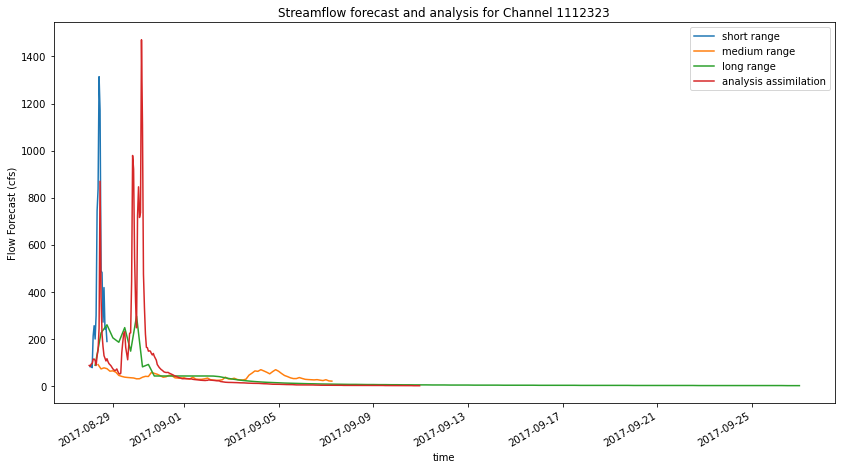

In [12]:
# plot the streamflow forecast data
plt.figure(figsize=(14,7))
short_range.plot()
medium_range.plot()
long_range.plot()
analysis_assim.plot()

plt.ylabel('{} ({})'.format(short_range.variable_name,short_range.variable_unit))
plt.title('Streamflow forecast and analysis for Channel 1112323')
plt.legend(labels=['short range','medium range','long range','analysis assimilation'])

**Step3: Explore other forecast results**

Aside from streamflow data, NWM provides forecasts for other variables (e.g., soil moisture and groundwater runoff). We will download and visualize some of these datasets.

Download the near surface soil saturation data for the same grid cell (comid=[833, 2596]). The data is **short range** forecast for 2017-08-28 with model initiation time as 00:00.

In [13]:
# download near surface soil saturation data
soil_sat = nwm_data.get_data(archive='harvey', config='short_range', geom='land',
                             variable='SOILSAT_TOP', comid=[833, 2596], init_time=0, 
                             start_date='2017-08-28')

*Double-click __here__ for the solution.*

<!-- Your answer is below:

soil_sat = nwm_data.get_data(archive='harvey', config='short_range', geom='land',
                             variable='SOILSAT_TOP', comid=[833, 2596], init_time=0, 
                             start_date='2017-08-28')
-->

Plot the soil saturation data. It can be found that the near surface soil is highly saturated during heavy rainfall period (check with the rain rate plot above). 

Text(0.5, 1.0, 'Near surface soil saturation for grid cell [833, 2596]')

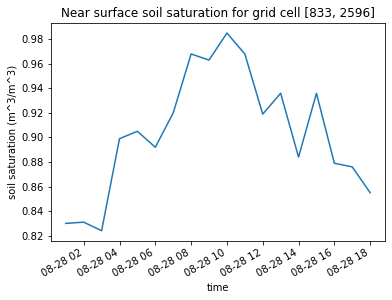

In [14]:
# plot near surface soil saturation data
soil_sat.plot()
plt.ylabel('soil saturation (m^3/m^3)')
plt.title('Near surface soil saturation for grid cell [833, 2596]')

Download the accumulated groundwater runoff data for the same grid cell (comid=[833, 2596]). The data is **long range** forecast starting from 2017-08-28 with model initiation time as 00:00.

In [15]:
# download accumulated groundwater runoff data
groundwater_runoff = nwm_data.get_data(archive='harvey', config='long_range', geom='land',
                                       variable='UGDRNOFF', comid=[833, 2596], time_lag=0, 
                                       start_date='2017-08-28')

*Double-click __here__ for the solution.*

<!-- Your answer is below:

groundwater_runoff = nwm_data.get_data(archive='harvey', config='long_range', geom='land',
                                       variable='UGDRNOFF', comid=[833, 2596], time_lag=0, 
                                       start_date='2017-08-28')

-->

Plot the accumulated groundwater runoff data. How much groundwater runoff was generated during Aug 28-30th? 

Text(0.5, 1.0, 'Accumulated groundwater runoff for grid cell [833, 2596]')

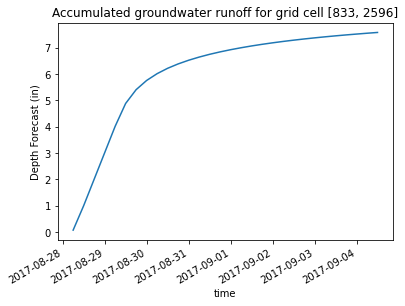

In [16]:
# plot accumulated groundwater runoff data
groundwater_runoff.plot()
plt.ylabel('{} ({})'.format(groundwater_runoff.variable_name,groundwater_runoff.variable_unit))
plt.title('Accumulated groundwater runoff for grid cell [833, 2596]')